In [1]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import datetime

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [3]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 9

In [4]:
def gen_chart(
    df: pd.DataFrame,
    df0: pd.DataFrame,
    code: str,
    date_str: str,
    flag_save: bool = False,
):
    fig, ax = plt.subplots(figsize=(6, 2.5))

    # Bollinger bands
    period = 13
    mv_median = df0["Close"].rolling(period).median()
    mv_q1 = df0["Close"].rolling(period).quantile(0.25)
    mv_q3 = df0["Close"].rolling(period).quantile(0.75)
    mv_iqr = mv_q3 - mv_q1
    mv_lower = mv_q1 - mv_iqr * 1.5
    mv_upper = mv_q3 + mv_iqr * 1.5

    apds = [
        mpf.make_addplot(
            mv_upper[df.index],
            width=1,
            color="C1",
            linestyle="dotted",
            label="Upper bound",
            ax=ax,
        ),
        mpf.make_addplot(
            mv_q3[df.index],
            width=1,
            color="C2",
            linestyle="dashed",
            label="Q3 (75%)",
            ax=ax,
        ),
        mpf.make_addplot(
            mv_median[df.index],
            width=1,
            color="C3",
            linestyle="solid",
            label="Median",
            ax=ax,
        ),
        mpf.make_addplot(
            mv_q1[df.index],
            width=1,
            color="C4",
            linestyle="dashed",
            label="Q1 (25%)",
            ax=ax,
        ),
        mpf.make_addplot(
            mv_lower[df.index],
            width=1,
            color="C5",
            linestyle="dotted",
            label="Lower bound",
            ax=ax,
        ),
    ]
    mpf.plot(
        df,
        type="candle",
        style="default",
        addplot=apds,
        datetime_format="%m/%d",
        xrotation=0,
        update_width_config=dict(candle_linewidth=0.75),
        ax=ax,
    )
    y_lower, y_higher = ax.get_ylim()
    if y_lower <= 0:
        ax.set_ylim(0, y_higher)
    ax.legend(loc="best", fontsize=6)
    ax.grid()

    if "longName" in ticker.info:
        ax.set_title(f"Weekly chart for {ticker.info["longName"]} ({code})")
    elif "shortName" in ticker.info:
        ax.set_title(f"Weekly chart for {ticker.info["shortName"]} ({code})")
    else:
        ax.set_title(f"Weekly chart for {code}")

    plt.tight_layout()
    if flag_save:
        plt.savefig(f"{date_str}_daily_chart_{code}.png")
    plt.show()

In [5]:
list_code = [
    "1328",
    "1459",
    "3402",
    "3687",
    "3697",
    "5016",
    "8267",
    "8410",
    "8729",
    "9432",
]

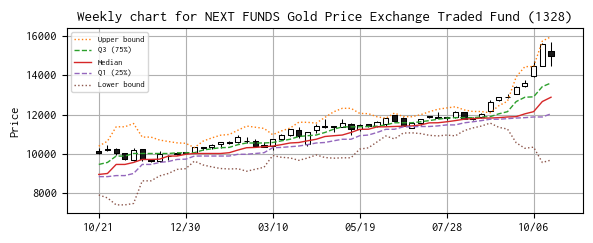

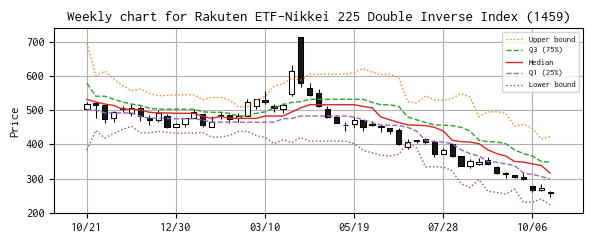

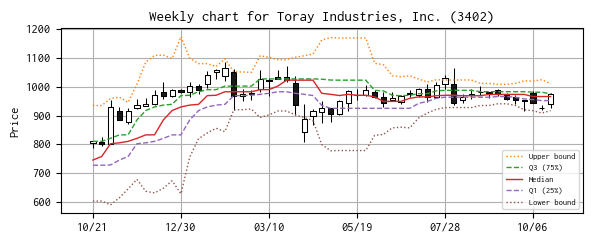

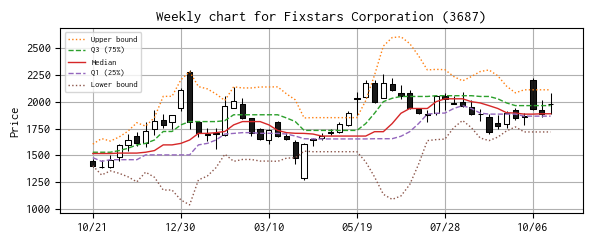

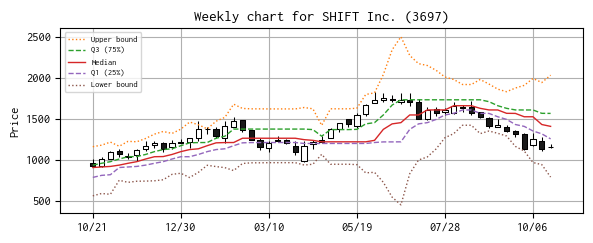

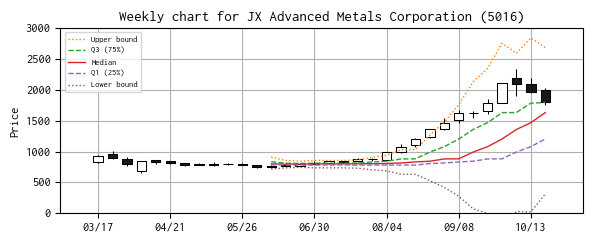

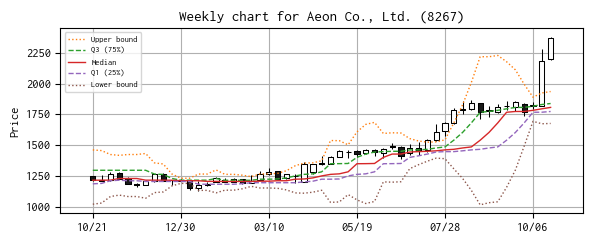

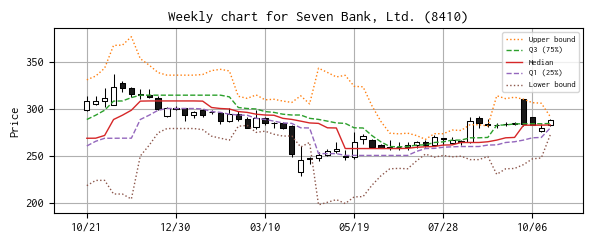

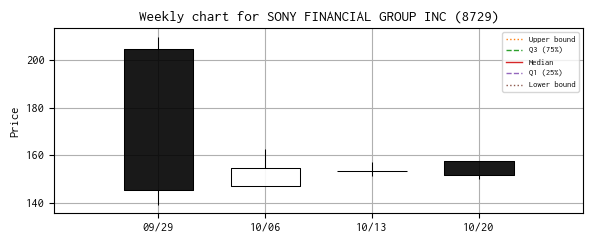

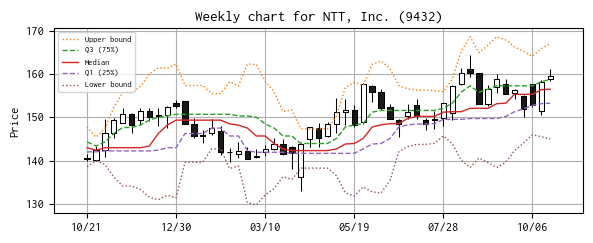

In [6]:
for code in list_code:
    symbol = f"{code}.T"
    ticker = yf.Ticker(symbol)
    df = ticker.history(period="1y", interval="1wk")
    df_longer = ticker.history(period="2y", interval="1wk")
    dt = df.tail(1).index[0]
    date_str = f"{dt.month:02d}{dt.day:02d}"
    flag_save = False
    gen_chart(df, df_longer, code, date_str, flag_save)